In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Berka

## Original TGAN

In [4]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan.csv')
tgan_org_evaluator = DataEvaluator(real, fake)

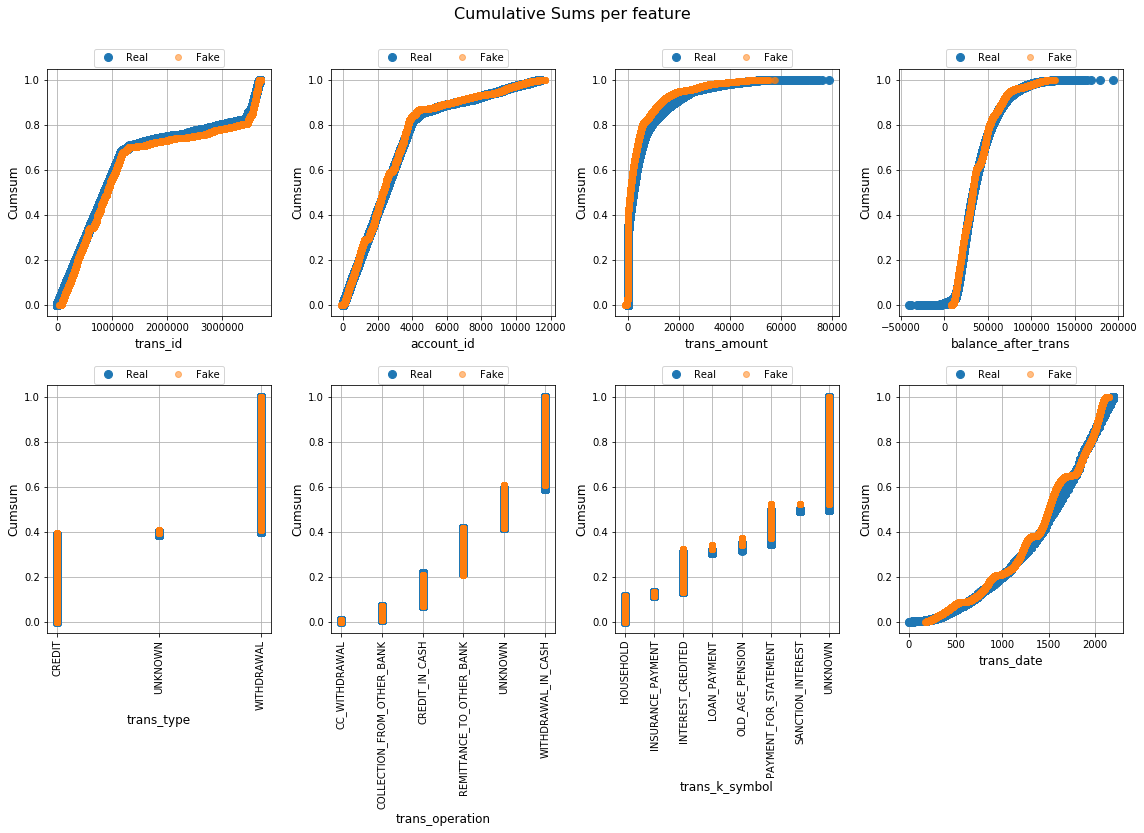

In [7]:
tgan_org_evaluator.plot_cumsums()

In [6]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9789
Correlation column correlations                 0.8997
Mean Correlation between fake and real columns  0.9620
Mean correlation classifier F1                  0.7778
Correlation 5 PCA components                    1.0000
Duplicate data between sets                     0.0000
Total Result                                    0.6590


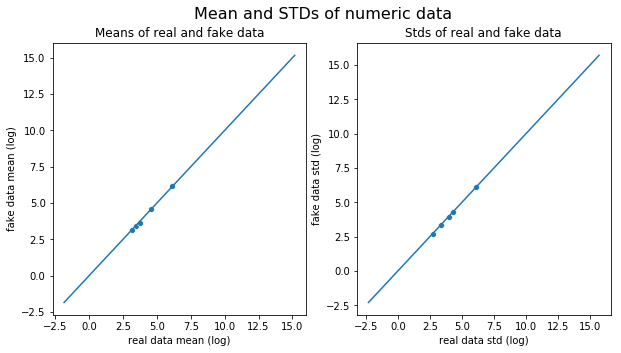

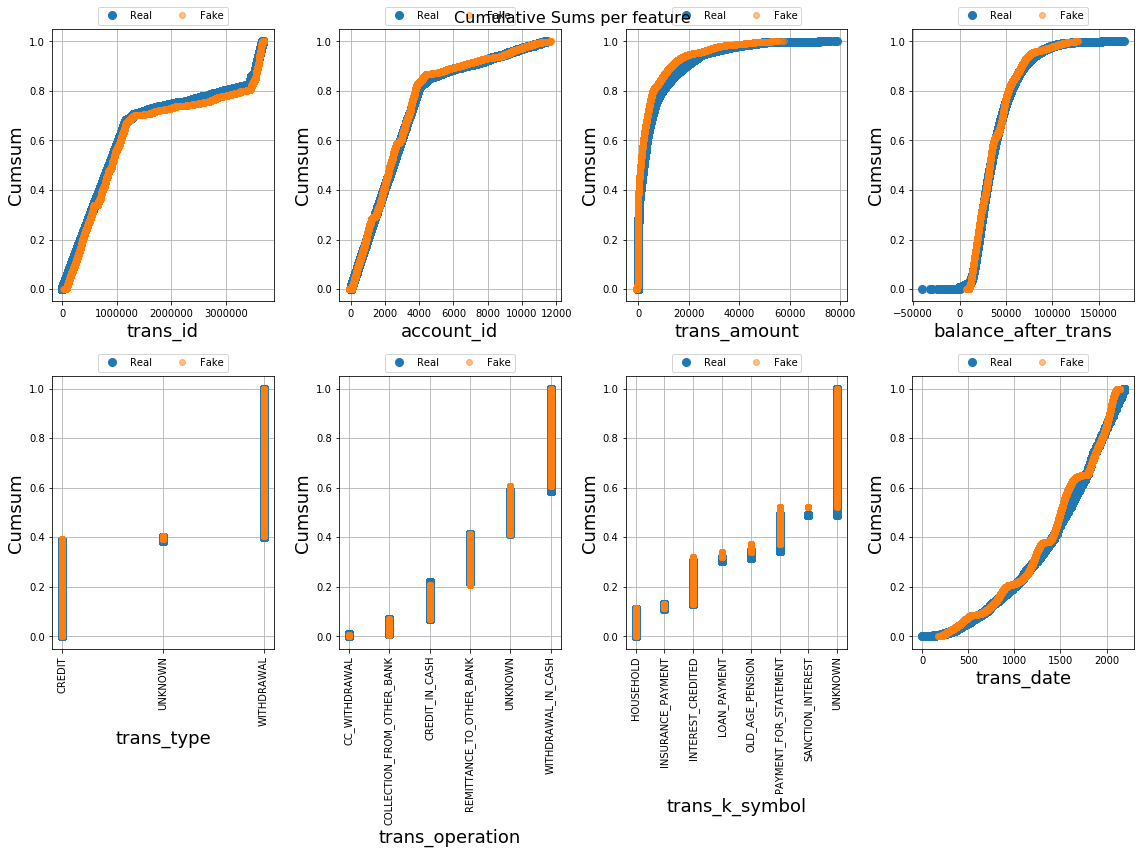

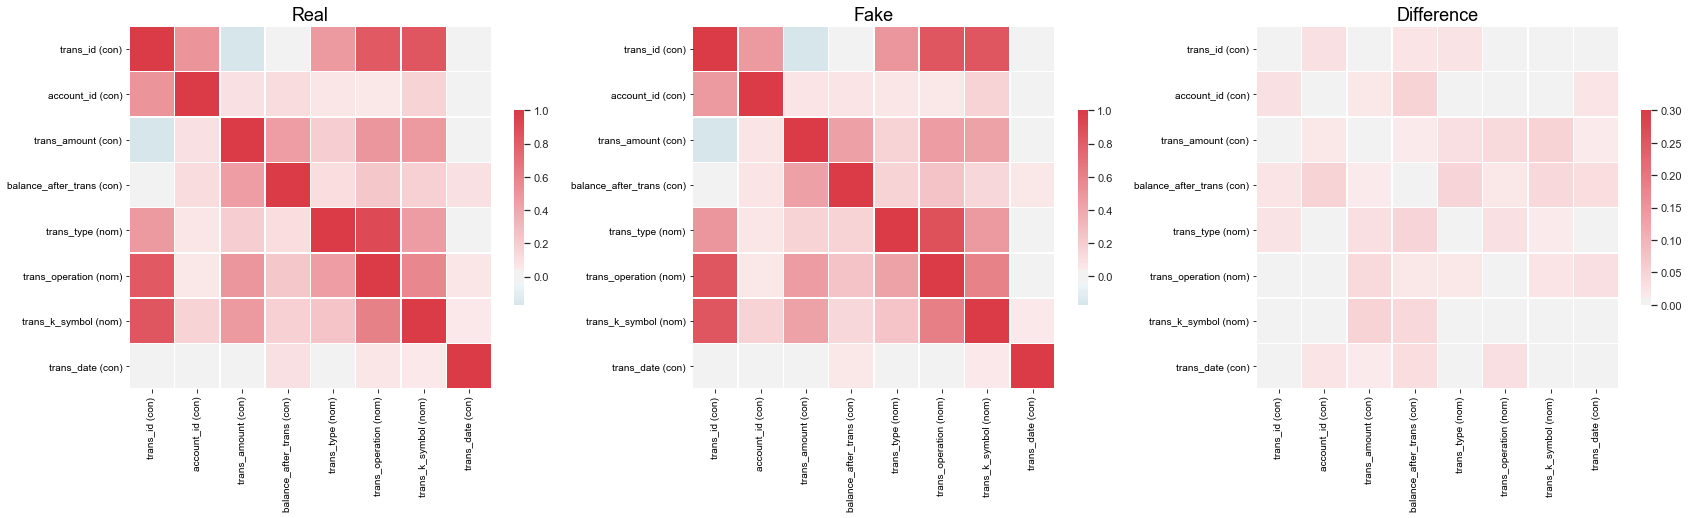

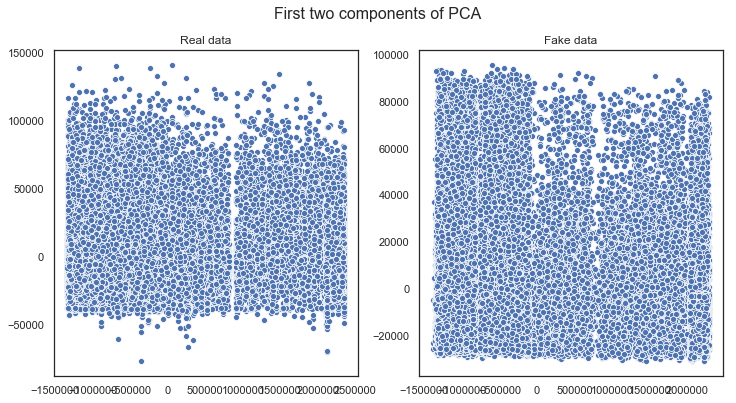

In [7]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [9]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-wgan-gp.csv')
wgan_evaluator = DataEvaluator(real, fake)

In [10]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=True)


Correlation metric: kendalltau

Basic statistical attributes:
                                               real                   fake
mean_trans_id                        1,335,249.8906         1,453,396.8164
mean_account_id                          2,928.1477             3,045.8621
mean_trans_amount                        5,959.9983             4,951.3144
mean_balance_after_trans                38,528.8641            37,184.8321
mean_trans_date                          1,463.6394             1,464.1854
median_trans_id                        859,867.5000           898,099.0000
median_account_id                        2,430.0000             2,282.5000
median_trans_amount                      2,100.0000             1,900.0000
median_balance_after_trans              33,276.2500            32,256.5000
median_trans_date                        1,559.0000             1,574.0000
std_trans_id                         1,227,852.8193         1,275,974.2668
std_account_id                       

C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4: DecisionTreeClassifier
5: MLPClassifier

Fitting fake
1: SGDClassifier
2: LogisticRegression
3: RandomForestClassifier


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


4: DecisionTreeClassifier
5: MLPClassifier

Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.7955 0.7744
real_data_LogisticRegression_F1     0.8004 0.7819
real_data_RandomForestClassifier_F1 0.9846 0.9730
real_data_DecisionTreeClassifier_F1 0.9754 0.9100
real_data_MLPClassifier_F1          0.6116 0.8345
fake_data_SGDClassifier_F1          0.7205 0.7095
fake_data_LogisticRegression_F1     0.7271 0.7311
fake_data_RandomForestClassifier_F1 0.9305 0.9419
fake_data_DecisionTreeClassifier_F1 0.9173 0.9091
fake_data_MLPClassifier_F1          0.5982 0.7672

Top 5 PCA components:
                    real                   fake
0 1,507,626,946,749.5935 1,628,119,347,715.7405
1       511,331,914.5847       656,813,842.9675
2        65,527,775.6653        62,556,714.1353
3         4,324,045.3763         5,664,841.8953
4           258,400.8971           275,034.0115

Results:
Number of duplicate rows is ignored for total score.
          

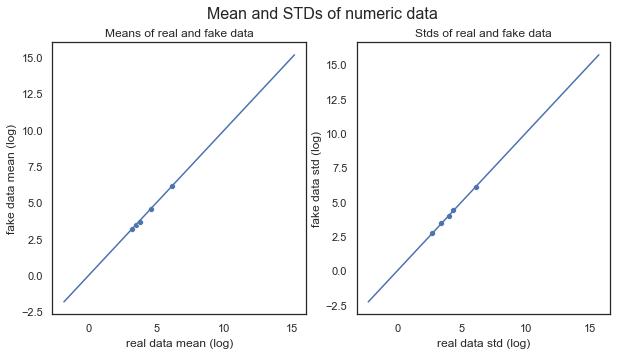

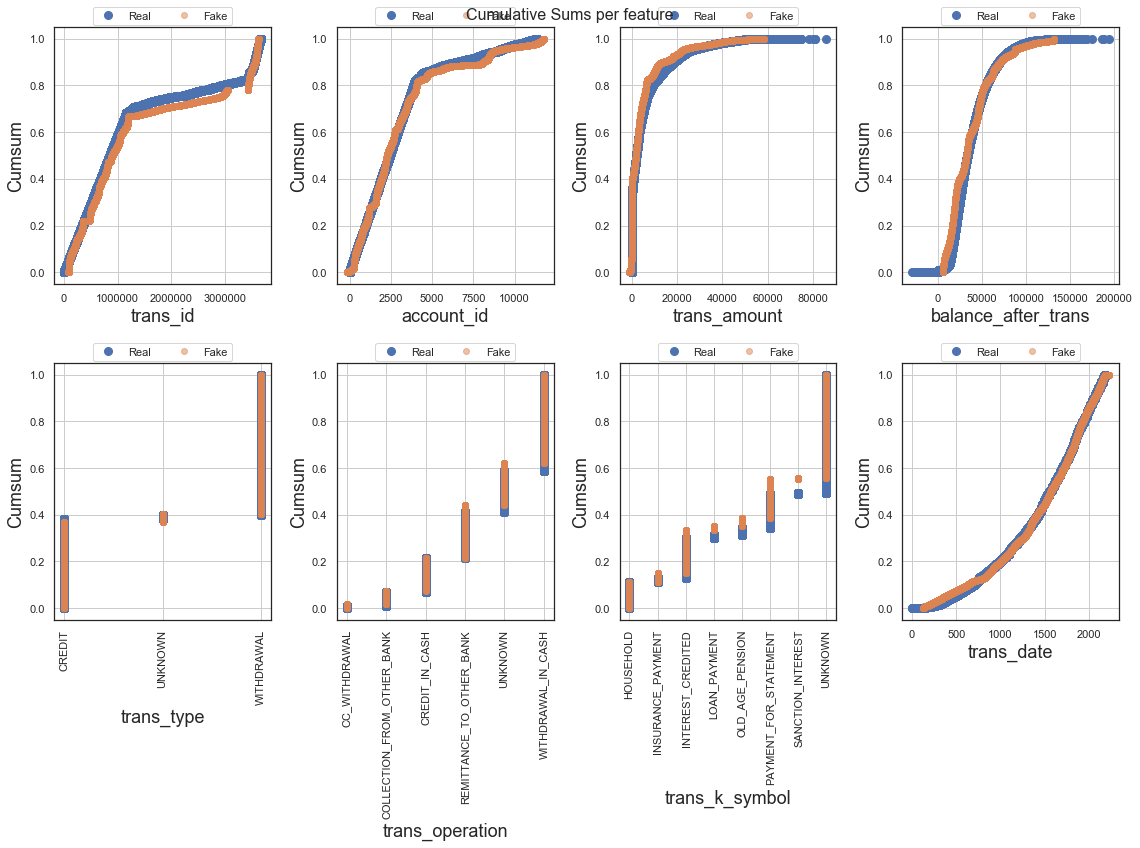

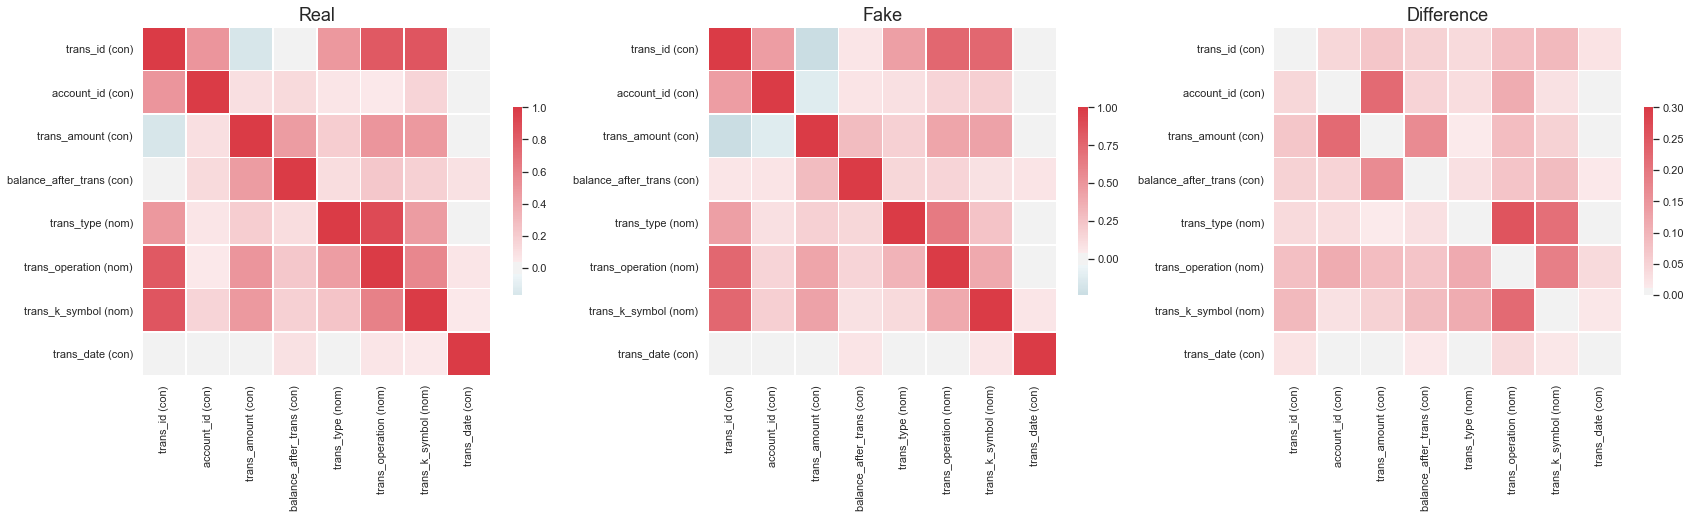

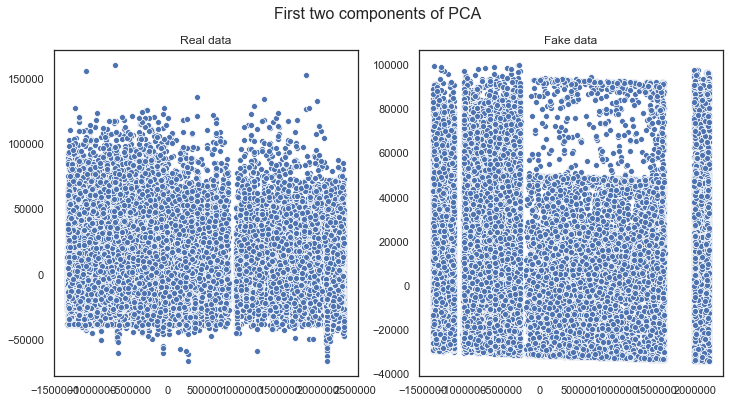

In [12]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [13]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-skip-connections.csv')
skip_evaluator = DataEvaluator(real, fake)

In [14]:
skip_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9579
Correlation column correlations                 0.9089
Mean Correlation between fake and real columns  0.9509
Mean correlation classifier F1                  0.7333
Correlation 5 PCA components                    1.0000
Duplicate data between sets                     0.0000
Total Result                                    0.9102


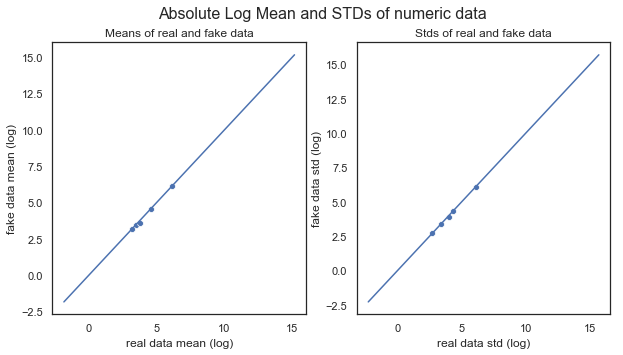

8 4 2
2


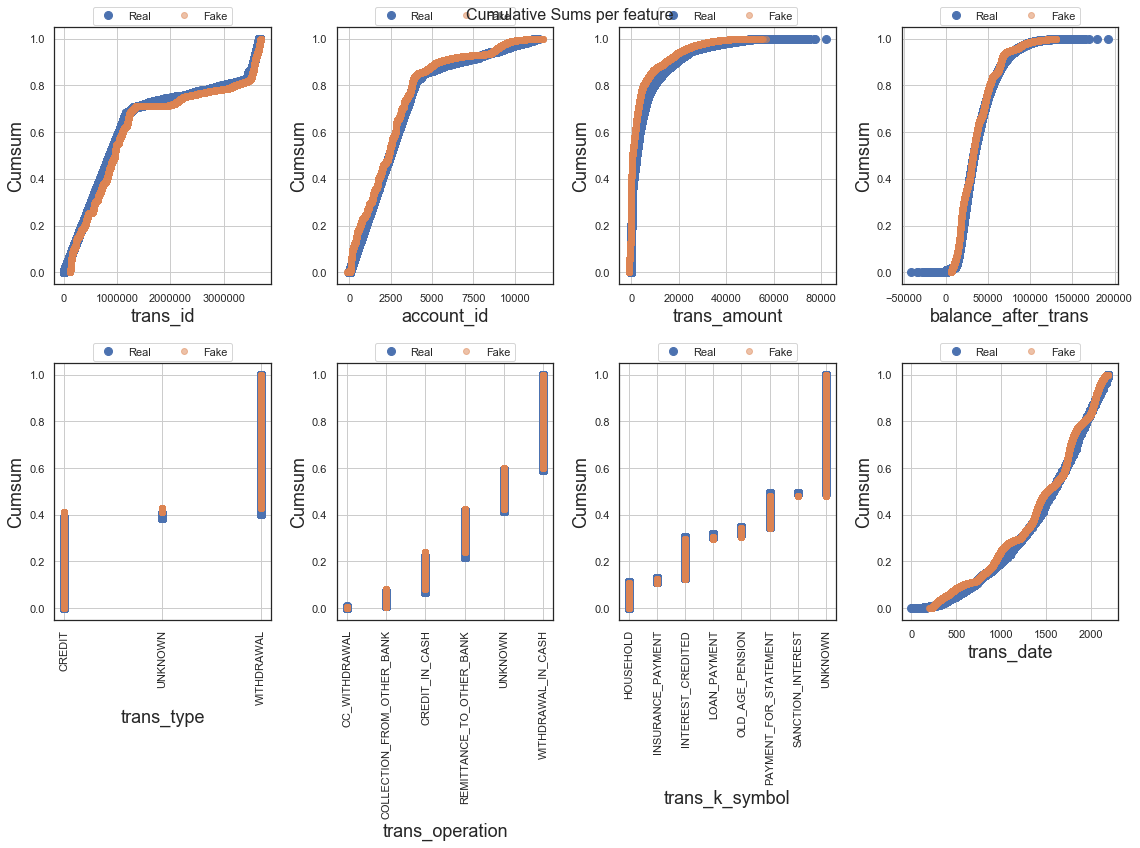

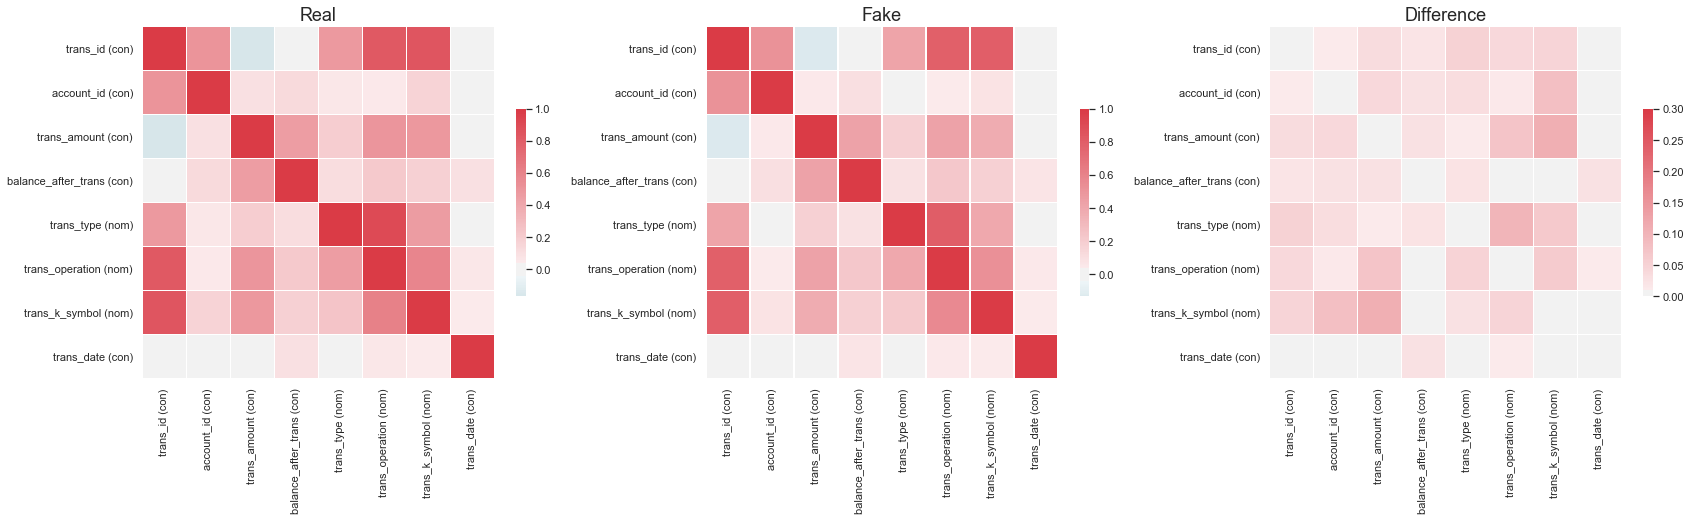

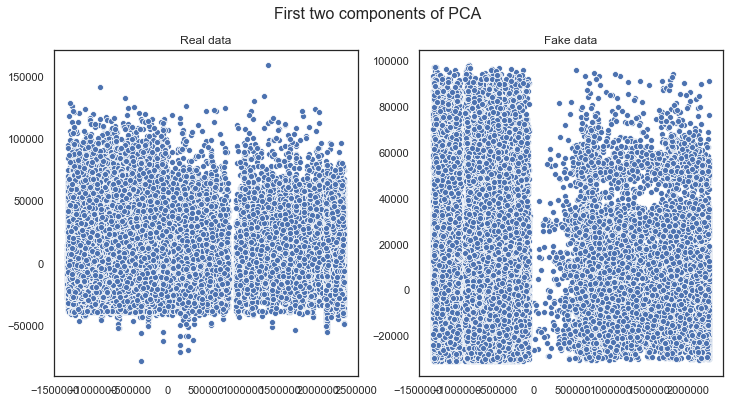

In [22]:
skip_evaluator.visual_evaluation(annot=False)

8 4 2


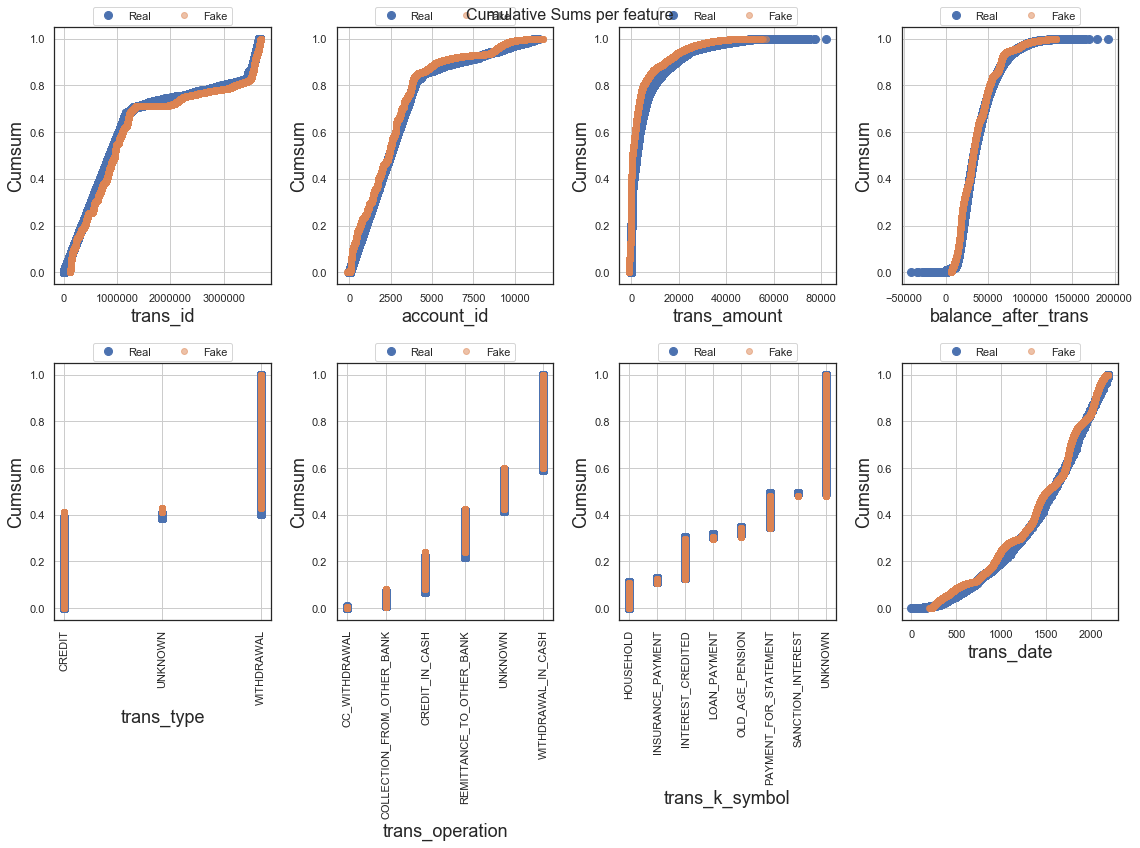

In [21]:
skip_evaluator.plot_cumsums()

## MedGAN

In [17]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_medgan_100.csv')
medgan_evaluator = DataEvaluator(real, fake)

In [23]:
medgan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Results:
Number of duplicate rows is ignored for total score.
                                                   Result
basic statistics                                   0.7579
Correlation column correlations                    0.5485
Mean Correlation between fake and real columns     0.5659
Mean correlation classifier F1                     0.3596
Correlation 5 PCA components                       1.0000
Duplicate data between sets                    7,563.0000
Total Result                                       0.6464


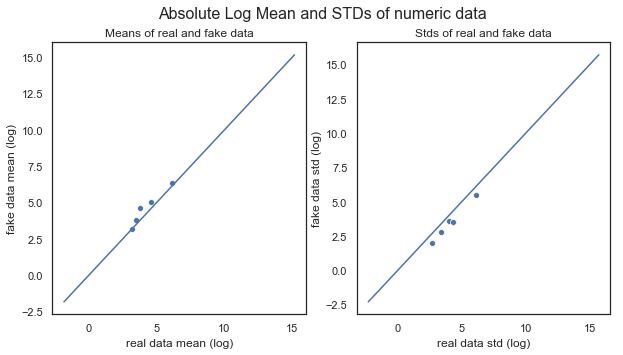

8 4 2
2


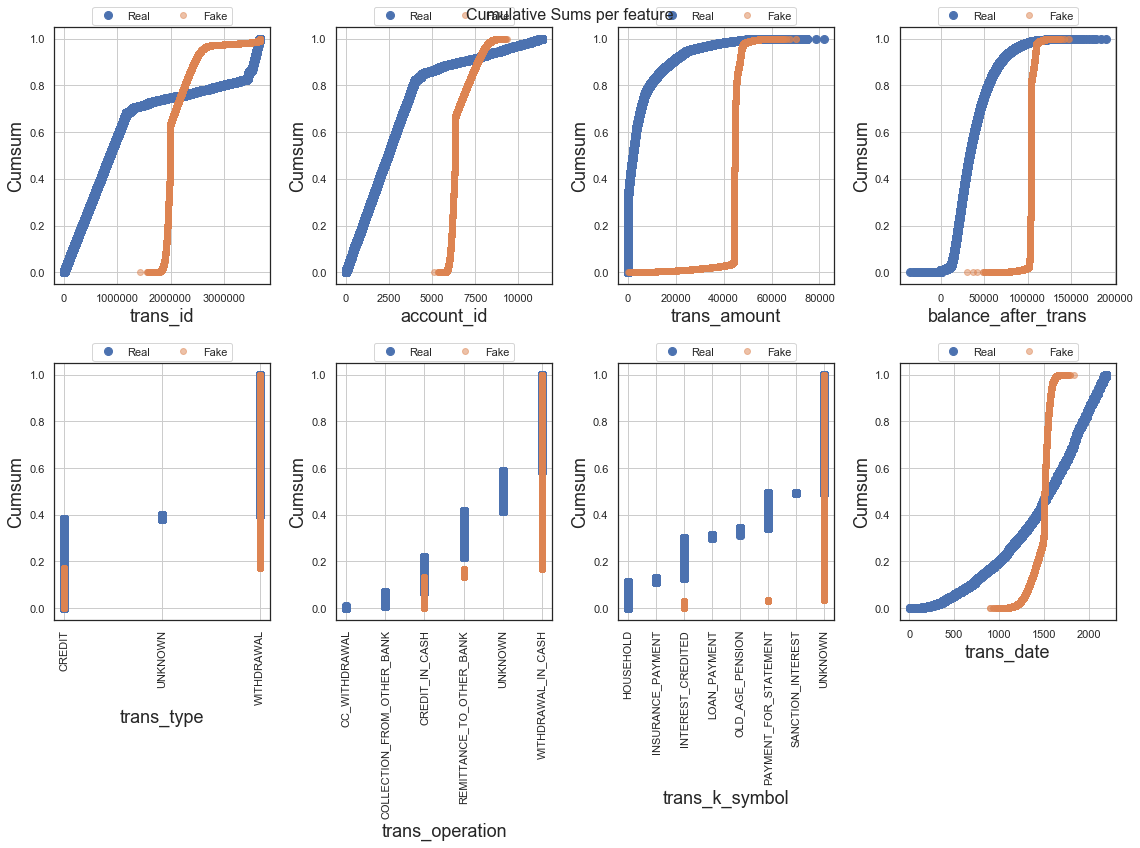

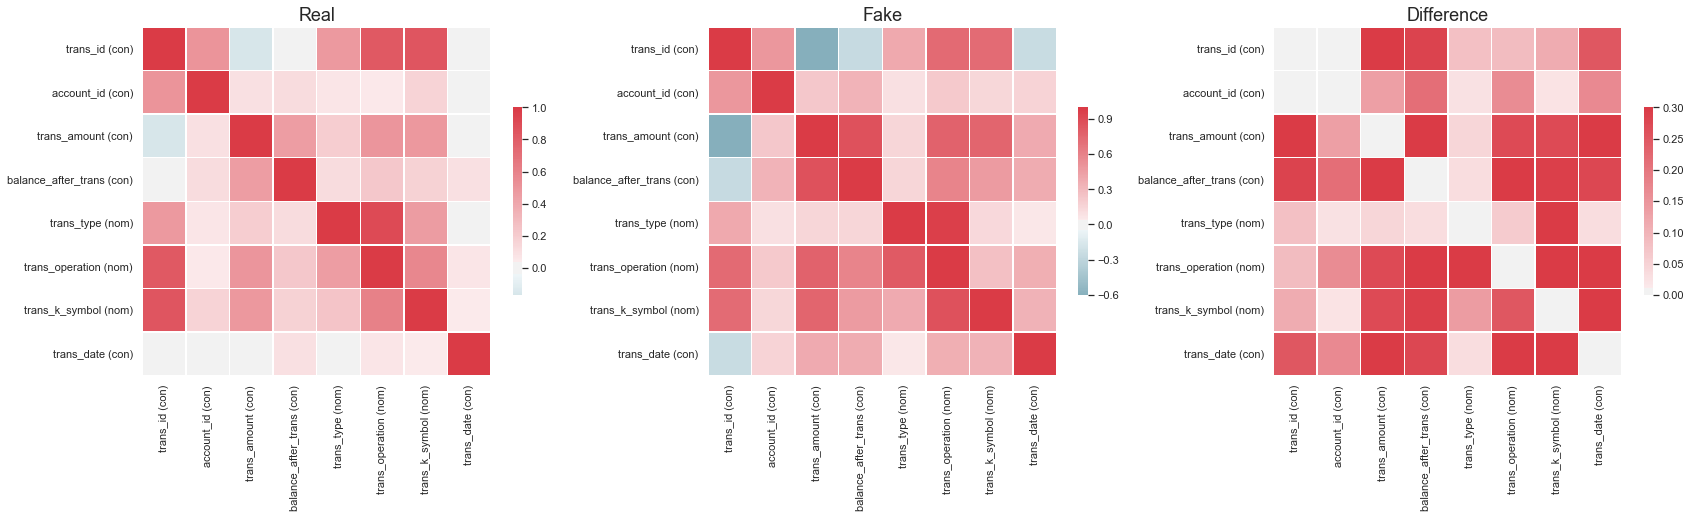

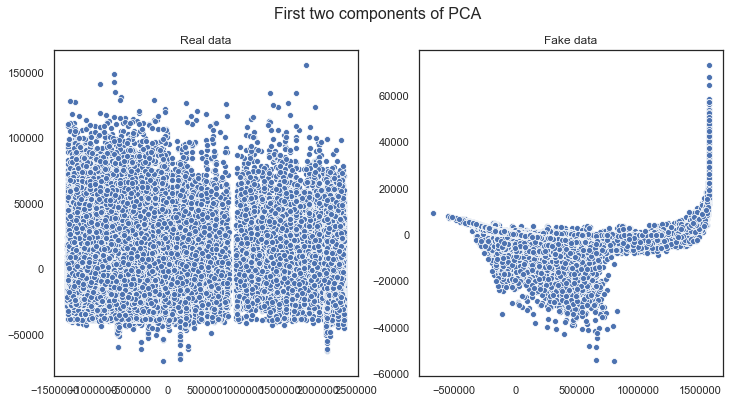

In [24]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [11]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_tablegan_100.csv')
tablegan_evaluator = DataEvaluator(real, fake)

In [26]:
tablegan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: kendalltau


C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9684
Correlation column correlations                 0.5366
Mean Correlation between fake and real columns  0.9098
Mean correlation classifier F1                  0.6889
Correlation 5 PCA components                    1.0000
Duplicate data between sets                     0.0000
Total Result                                    0.8207


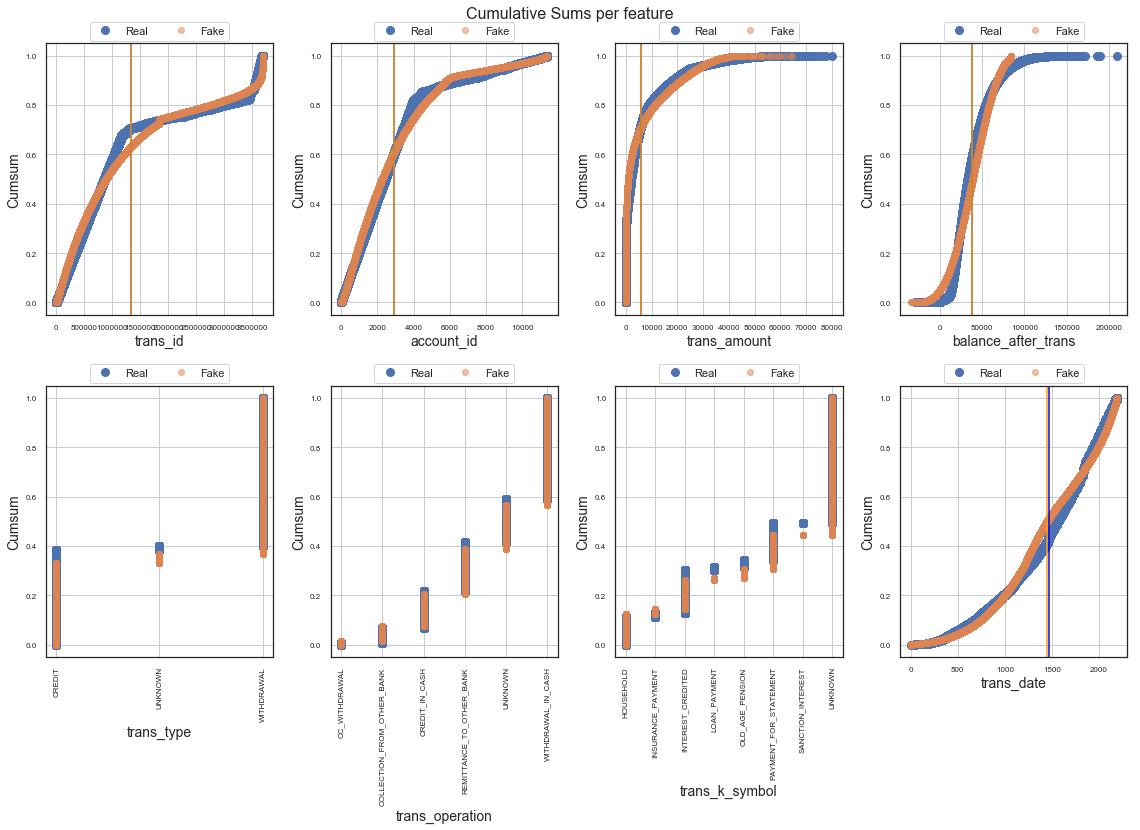

In [15]:
tablegan_evaluator.plot_cumsums()

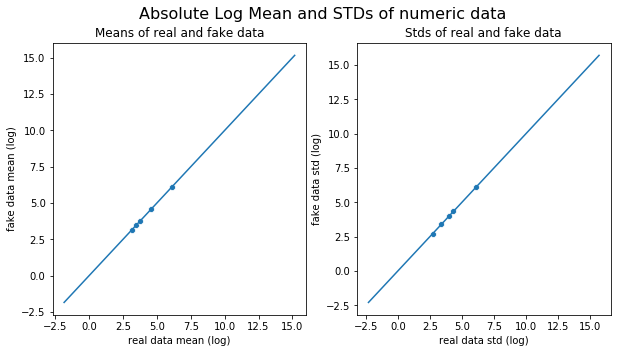

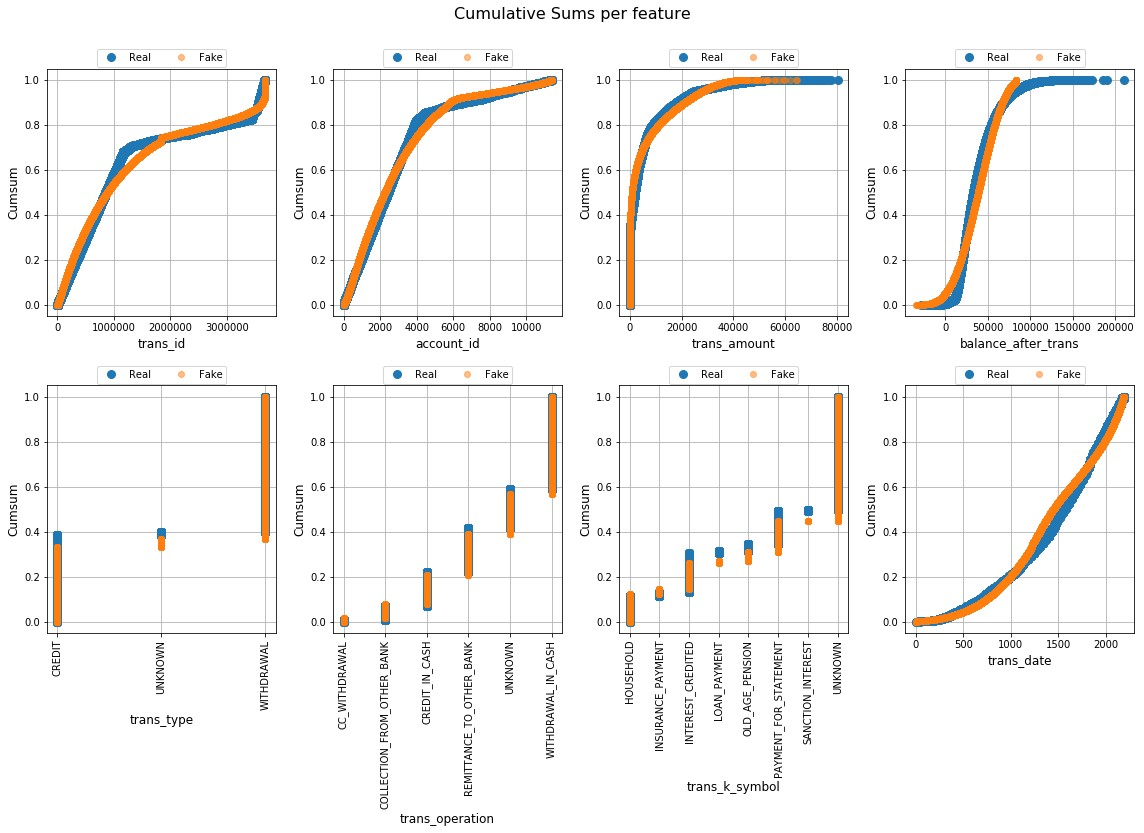

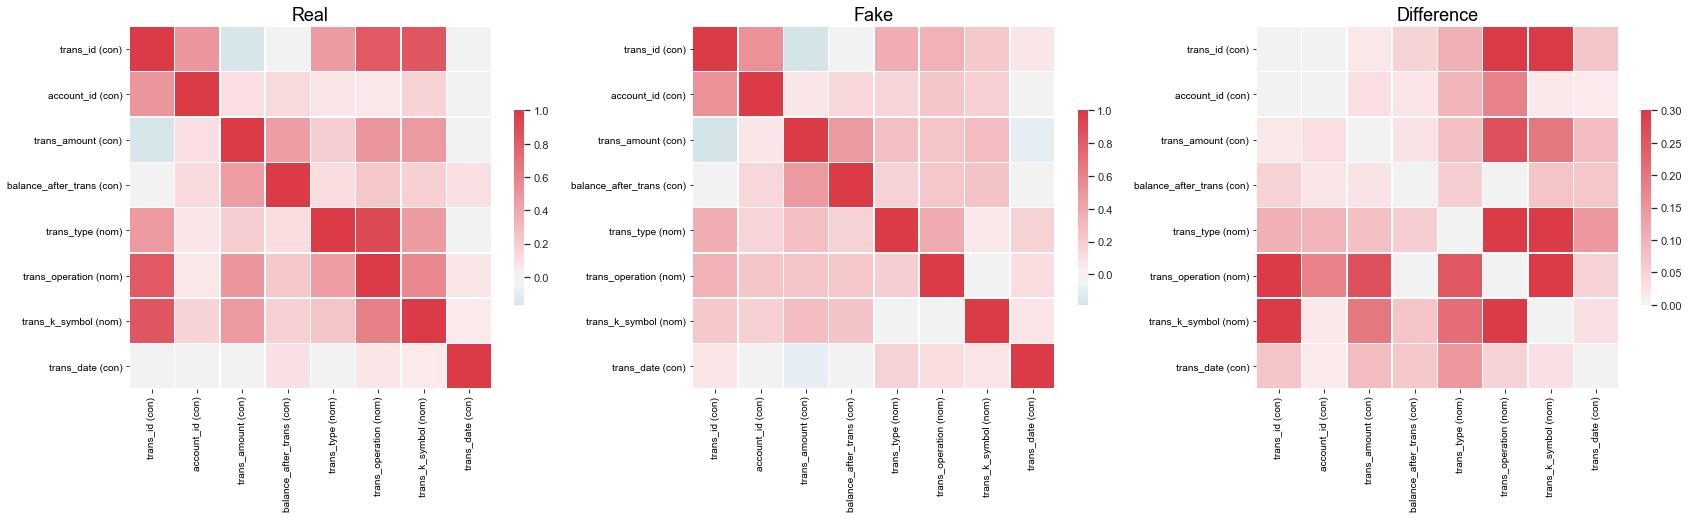

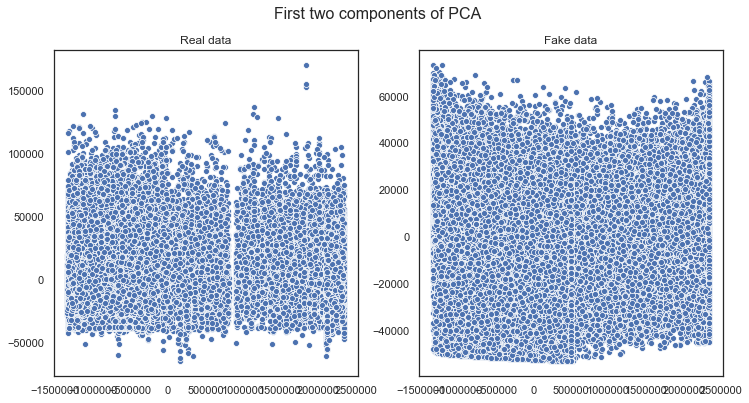

In [12]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [24]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[3.15558081e-03 2.25478515e-03 1.00895154e-02 1.60792182e-03 3.68700434e-03 0.00000000e+00 4.03186594e-05 0.00000000e+00 0.00000000e+00 3.42898353e-05 2.31575622e-04 0.00000000e+00 6.94454588e-04 2.26483782e-02
 1.71159461e-03 2.68261433e-03 5.46665979e-01 2.46056113e-03 4.02035426e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[ 5  7  8 11  9  6 10 12  3 14  1 17 15  0  

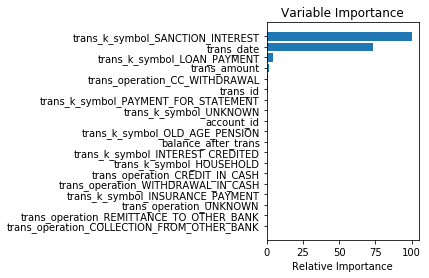

In [26]:
feature_importance = tgan_org_evaluator.f_classifiers[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

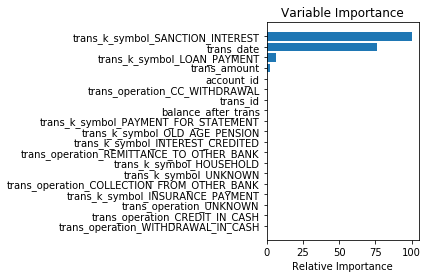

In [27]:
feature_importance = tgan_org_evaluator.r_classifiers[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()